In [20]:
import os
from pathlib import Path
import imghdr
from functions import *
from PIL import Image

### For cleaning images that tensorflow cannot read

In [3]:
# directory = 'data/Siamese/'
# image_extensions = [".png", ".jpg", ".jpeg", ".bmp"]  

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(directory).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.remove(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
#             os.remove(filepath)

In [4]:
BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '../../../Documents/data/',
    seed = 123,
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    subset = 'training',
    validation_split = 0.2,
)

Found 889 files belonging to 9 classes.
Using 712 files for training.


In [6]:
vali_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '../../../Documents/data/',
    seed = 123,
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    subset = 'validation',
    validation_split = 0.2,
)

Found 889 files belonging to 9 classes.
Using 177 files for validation.


In [7]:
class_names = train_ds.class_names

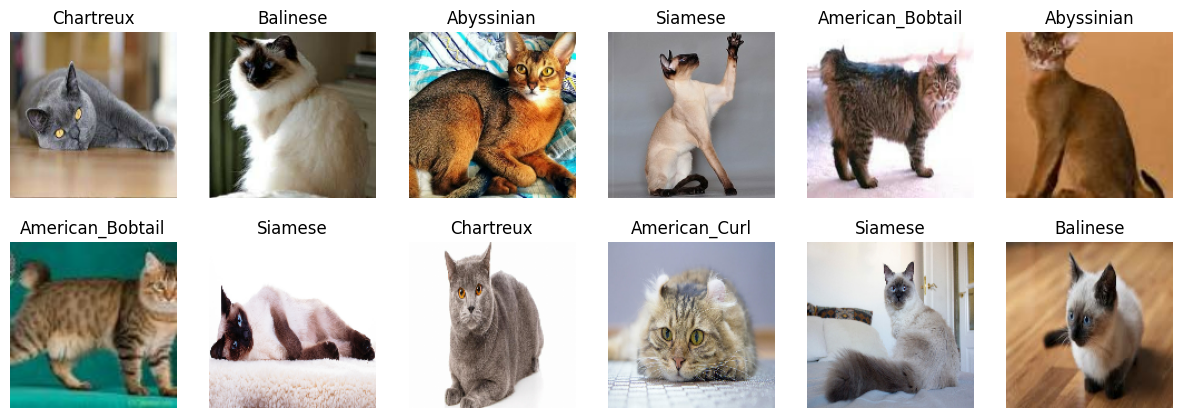

In [8]:
plt.figure(figsize=(15,5))

for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(2,6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(9)
])

In [10]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [11]:
# history = model.fit(
#     train_ds,
#     validation_data = vali_ds,
#     epochs = 10
# )

In [12]:
# plotsave_accuracy(history, 'cats9acc')

In [13]:
# plotsave_loss(history, 'cats9loss')

In [14]:
model = tf.keras.models.load_model('model/model1.h5')

1/1 [==============================] - 0s 22ms/step
This cat breed is : Abyssinian with 75.89 % confidence


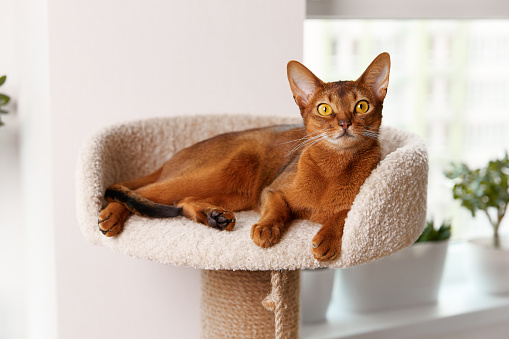

In [25]:
test_abys = "test/istockphoto-1354965146-170667a.jpg"
predict_breed(test_abys, model, IMG_HEIGHT, IMG_WIDTH, class_names)
Image.open(test_abys)


1/1 [==============================] - 0s 20ms/step
This cat breed is : Chartreux with 59.05 % confidence


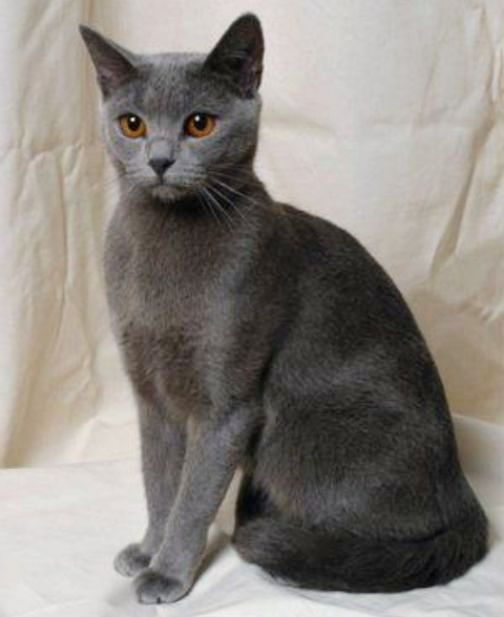

In [23]:
test_chtrx = "test/kucing-chartreux-b.jpg"
predict_breed(test_chtrx, model, IMG_HEIGHT, IMG_WIDTH, class_names)
Image.open(test_chtrx)

In [17]:
# model.save('model/model1.h5')